# Finch Carr - Lab 07 & Lab 08
## Event Selection Optimization
- I am supposed to pick either high or low pT samples, and in that sample, there are dedicated training samples for event selection optimization.
## Lab 7
### Problem 7.1
- I want to make a stacked histogram plot for the mass variable of my data and then compare $\frac{N_{higgs}}{\sqrt{N_{QCD}}}$ ***without event selection***
  - If the factors above are equivalent, I want to then explain why they are equivalent

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle as pk
import h5py
%matplotlib inline

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
pickle_higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
higgs = pk.load(pickle_higgs)
print(higgs.ndim, higgs.size)
higgs

2 1400000


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [3]:
pickle_qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
qcd = pk.load(pickle_qcd)
print(qcd.ndim, qcd.size)
qcd

2 1400000


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


#### Variables
- Each dataset (Higgs and QCD) have 14 features: $p_T$, $\eta$ (eta), $\phi$ (phi), 'mass', $e_2$, $e_3$, $D_2$, 'angularity', $\tau_1$, $\tau_2$, $\tau_3$, $\tau_{21}$, $\tau_{32}$, $Kt\Delta R$
- $p_T$ - Transverse Momentum
   - According to the papers provided, all simulated datapoints require a minimum $p_T$ value of 250 GeV to be counted as a possible signal; our entire QCD and Higgs sets of points have minimum $p_T$ measurements of this value or greater
- $\eta$ (eta) - Psudorapidity
  - For true Higgs boson detections, the papers describe that when the minimum $p_T$ value is set to 250 GeV, the maximum value for $\left|\eta\right|$ is less than or equal to 2.0
- $\phi$ (phi) - Azimuthal Angle
- mass - Transverse Invariant Mass
- Energy Corelation Functions (ECF)
  - $e_2$ **-   2-point ECF**
  - $e_3$ **-   3-point ECF**
  - $D_2$ **-   ratio of ee2 and ee3** 
- Angularity
- $\tau_1$, $\tau_2$, $\tau_3$, $\tau_{21}$, $\tau_{32}$ are N-subjettyness
- $Kt\Delta R$ is the $\Delta R$ value of two subjets within the large-R jet

In [4]:
#Define Higgs variables
hMass = higgs['mass']
hPt = higgs['pt']
hEta = higgs['eta']
hPhi = higgs['phi']
hEe2 = higgs['ee2']
hEe3 = higgs['ee3']
hD2 = higgs['d2']
hAngularity = higgs['angularity']
hT1 = higgs['t1']
hT2 = higgs['t2']
hT3 = higgs['t3']
hT21 = higgs['t21']
hT32 = higgs['t32']
hKtDeltaR = higgs['KtDeltaR']

# Do the same for QCD background
qMass = qcd['mass']
qPt = qcd['pt']
qEta = qcd['eta']
qPhi = qcd['phi']
qEe2 = qcd['ee2']
qEe3 = qcd['ee3']
qD2 = qcd['d2']
qAngularity = qcd['angularity']
qT1 = qcd['t1']
qT2 = qcd['t2']
qT3 = qcd['t3']
qT21 = qcd['t21']
qT32 = qcd['t32']
qKtDeltaR = qcd['KtDeltaR']

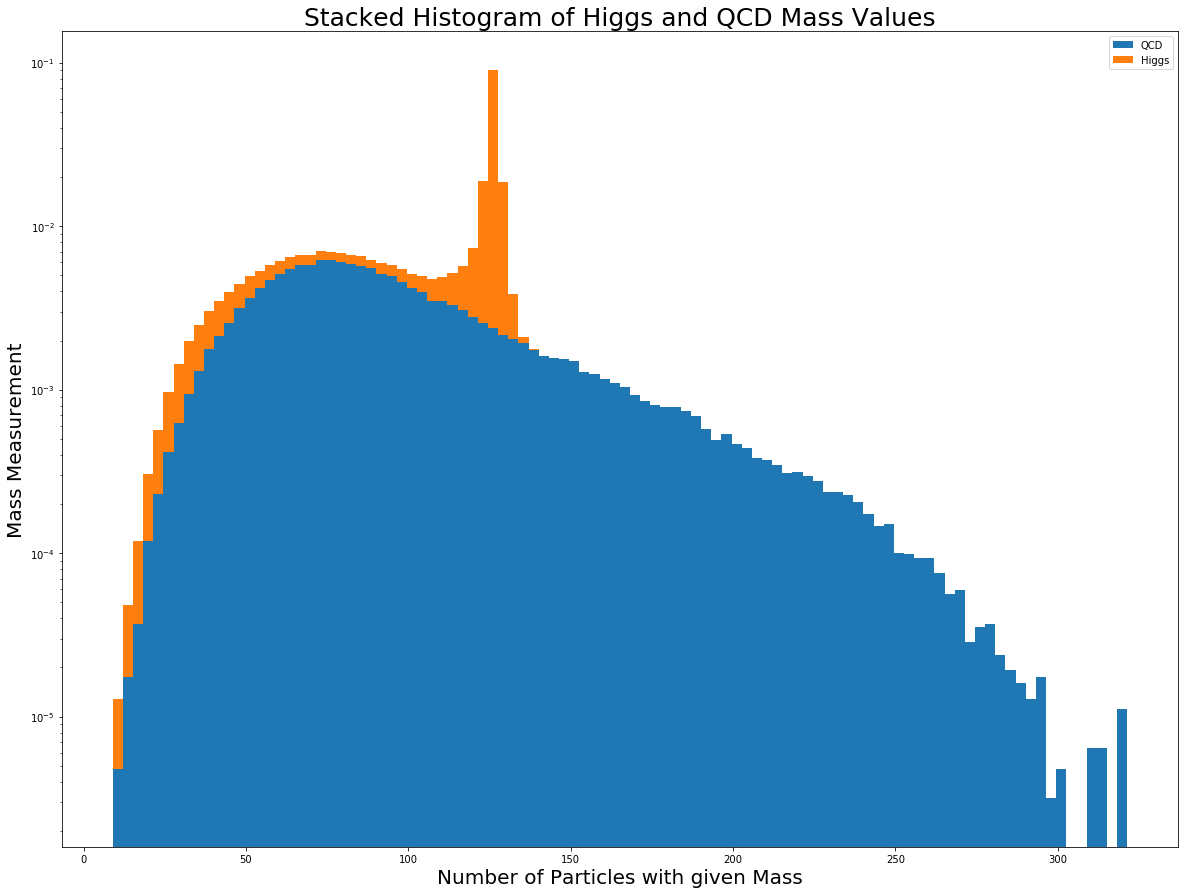

In [5]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')
n_bins = 100
ax.hist((qMass, hMass), bins=n_bins, density=True, histtype='bar', stacked=True, label=('QCD', 'Higgs'))
ax.set_title('Stacked Histogram of Higgs and QCD Mass Values',size=25)
ax.set_xlabel('Number of Particles with given Mass', size=20)
ax.set_ylabel('Mass Measurement', size=20)
ax.legend(loc='best')
plt.show()

In [6]:
Nhiggs = 100
Nqcd = 20000
Nhiggs / np.sqrt(Nqcd)

0.7071067811865475

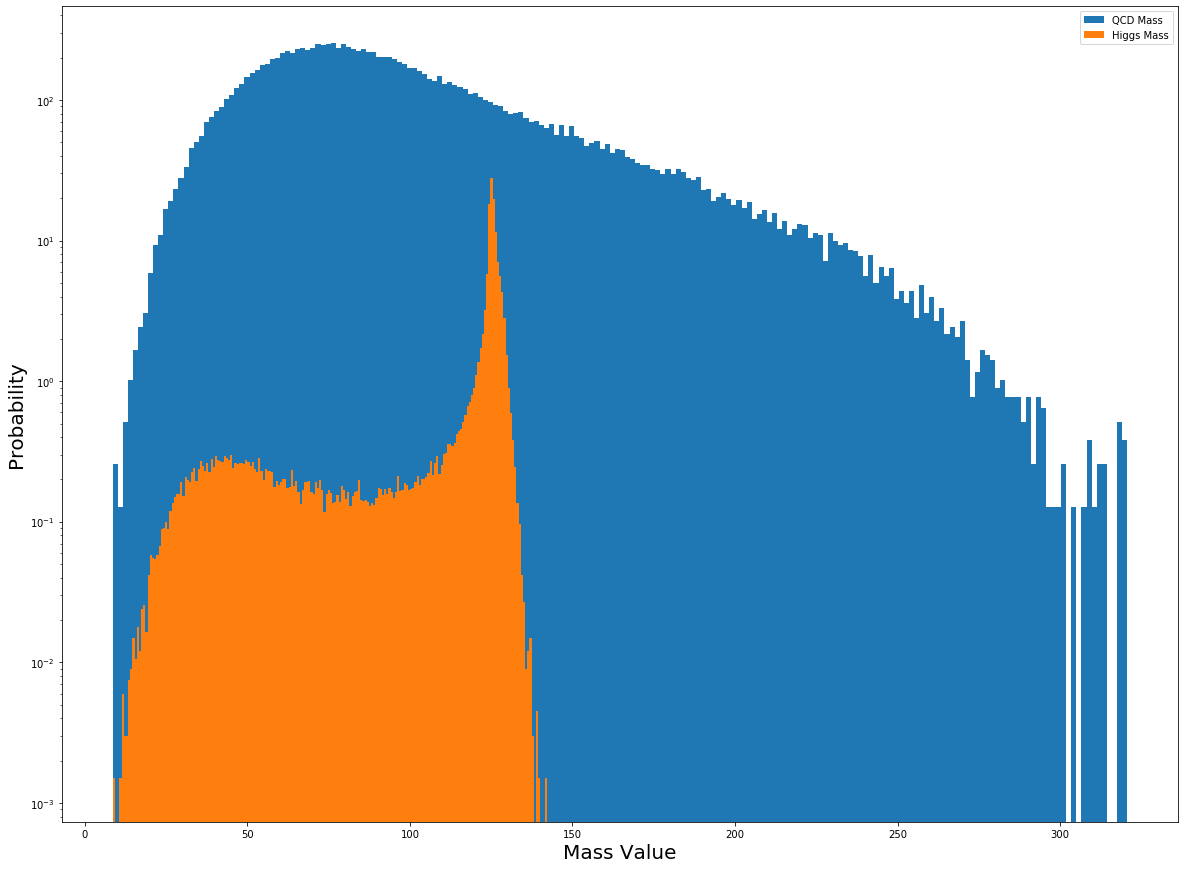

In [7]:
n_bins = 100
n_higgs = 100
n_qcd = 20000

#qcd data 
hist_qcd, bins_q = np.histogram(qMass, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMass, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

plt.xlabel('Mass Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend()
plt.show()

In [8]:
print(sum(hist_qcd * widths_qcd))
print(sum(hist_higgs * widths_higgs))

20000.000000000025
100.00000000000001


- Above, we see the normalized distributions by expected particle yield such that the area under both the Higgs and Background mass distributions are equal to the expected yields of particles, but on a log-scaled y-axis. 
  - The Higgs area is equal to 100 for an expected yield of 100 particles
  - The Background area is equal to 20000 for an expected yield of 20000 particles

In [9]:
# Basic Significance (No Cuts)
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5 = stats.poisson.ppf(sigma5, mu=np.mean(qMass))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5h = stats.poisson.ppf(sigma5, mu=np.mean(hMass))
print(f'{low5}=QCD low, {low5h}=Higgs low, {low5h / low5}=Low Ratio')
high5 = stats.poisson.ppf(1-sigma5, mu=np.mean(qMass))
high5h = stats.poisson.ppf(1-sigma5, mu=np.mean(hMass))
print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 53.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
53.0=QCD low, 65.0=Higgs low, 1.2264150943396226=Low Ratio
151.0=QCD high, 172.0=Higgs high, 1.1390728476821192=High Ratio


### Problem 7.2
- I now want to identify mass cuts to optimize the expected significance
- Mass cuts could theoretically be made such that we only measure particles within a certain mass window, making it more likely that a detection is a Higgs detection. This means we want masses of particles where it is more likely that they are Higgs particle detections than QCD background detections
- Another way to look at it using our simulated data is we want as few of the 100000 background datapoints left and as many of the 100000 Higgs datapoints left as possible after choosing a given mass cut / mass window

In [10]:
# Cut B: Tight Mass Window -- Only particles falling within one standard deviation of Mean Higgs Sample Mass Value
hMassB = []
qMassB = []
hMean = np.mean(hMass)
hStd = np.std(hMass) 
hMIN = hMean - hStd
hMAX = hMean + hStd
for i in range(len(hMass)):
    if hMass[i] < hMAX and hMass[i] > hMIN:
        hMassB.append(hMass[i])
    if qMass[i] < hMAX and qMass[i] > hMIN:
        qMassB.append(qMass[i])
len(hMassB), len(qMassB)

(86710, 33133)

- On page 12 of ***Eur. Phys. J. C 79 (2019) 836*** linked in the provided HTML file, the authors discuss that a *tight mass window* was identified that contained 68% of the Higgs particles for any given dataset, so by setting the upper and lower bounds of my mass window to be 1 standard deviation above and below the mean Higgs mass value, I created my own tight mass window, which actuall contains more than 68% of the simulated Higgs data. 
  - As seen above, it contains roughly 86000 of the original 100000 simulated datapoints. 
  - After further experimenting with the values of upper and lower mass value bounds, the mass cut that returned the best significance values is found below
    - This cut is further optimized bc while it contains much more background data, it also contains a lot of the removed Higgs data, which improves the significance

In [11]:
# Cut C: Tighter Mass Window
hMassC = []
qMassC = []
amass = 20
bmass = 130
hMINX = amass
hMAXX = bmass
for i in range(len(hMass)):
    if hMass[i] < hMAXX and hMass[i] > hMINX:
        hMassC.append(hMass[i])
    if qMass[i] < hMAXX and qMass[i] > hMINX:
        qMassC.append(qMass[i])
len(hMassC), len(qMassC)

(97665, 80631)

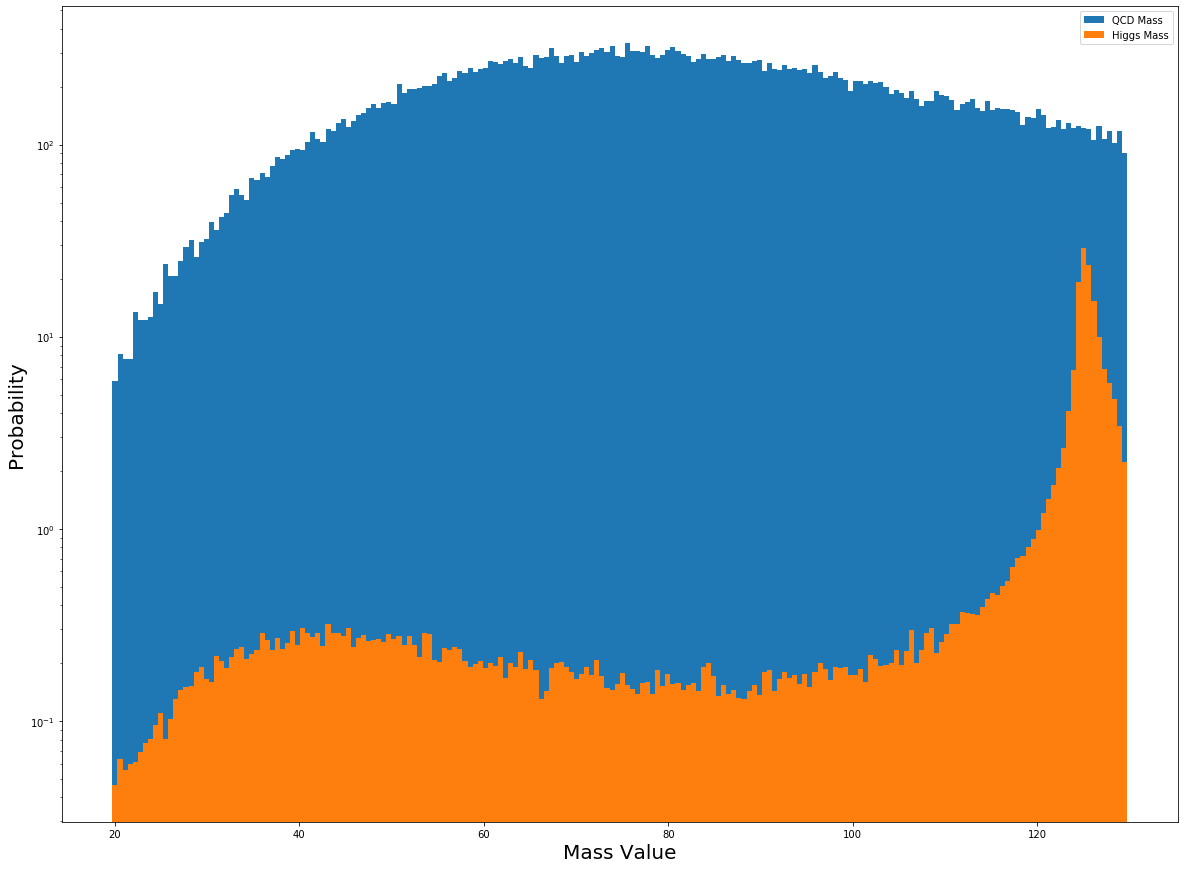

20000.000000000004
99.99999999999999


In [12]:
# Plotting Mass Cut C
hist_qcd, bins_q = np.histogram(qMassC, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMassC, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

plt.xlabel('Mass Value', size=20)
plt.ylabel('Probability', size=20)
plt.yscale('log')
plt.legend()
plt.show()
print(sum(hist_qcd * widths_qcd))
print(sum(hist_higgs * widths_higgs))

In [13]:
Nhiggs = 100
Nqcd = 20000
Nhiggs / np.sqrt(Nqcd)
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5C = stats.poisson.ppf(sigma5, mu=np.mean(qMassC))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5C} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5hC = stats.poisson.ppf(sigma5, mu=np.mean(hMassC))
print(f'{low5C}=QCD low, {low5hC}=Higgs low, {low5hC / low5C}=Low Ratio')

high5C = stats.poisson.ppf(1-sigma5, mu=np.mean(qMassC))
high5hC = stats.poisson.ppf(1-sigma5, mu=np.mean(hMassC))
print(f'{high5C}=QCD high, {high5hC}=Higgs high, {high5hC / high5C}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 40.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
40.0=QCD low, 65.0=Higgs low, 1.625=Low Ratio
129.0=QCD high, 172.0=Higgs high, 1.3333333333333333=High Ratio


### Problem 7.3A
- Now I want to identify variable cuts that would increase my significance values just like I did with mass cuts, but with other variables like Tau2

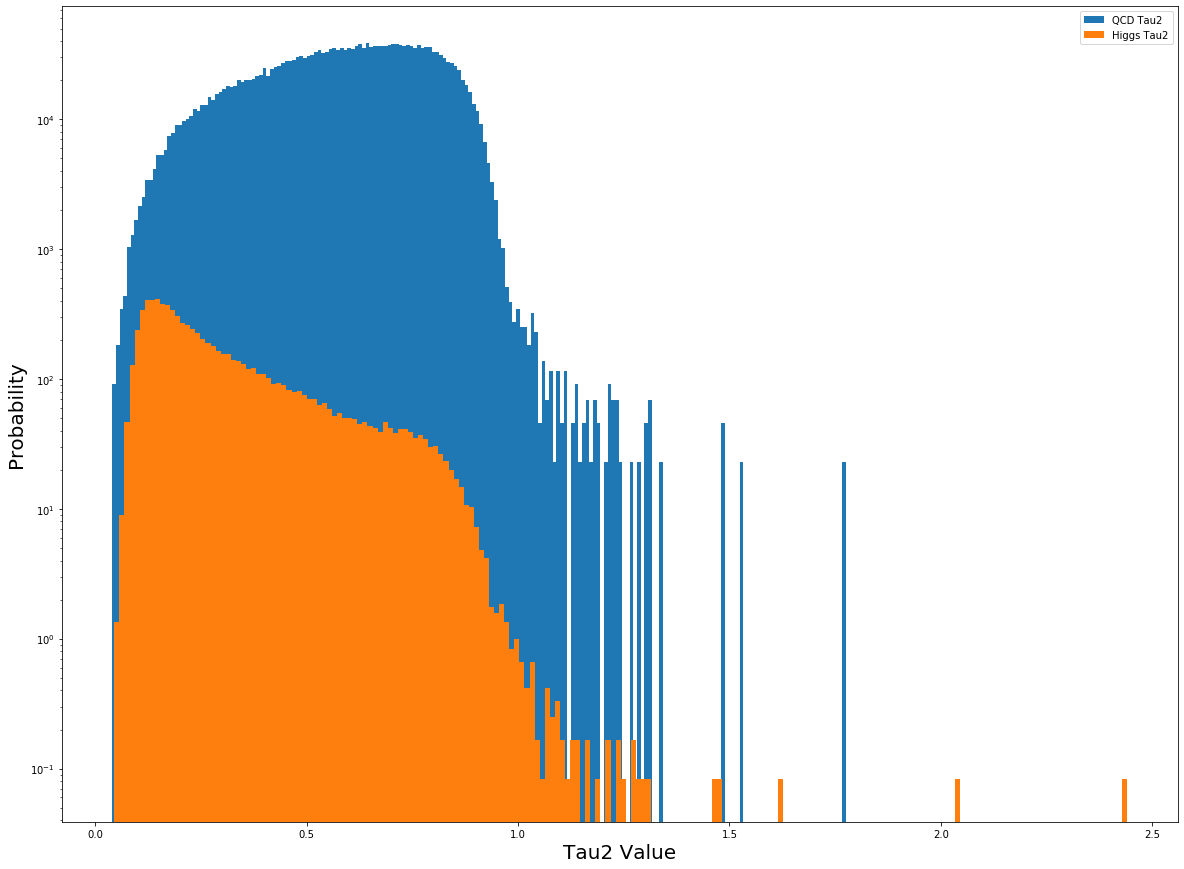

In [14]:
n_bins = 100
n_higgs = 100
n_qcd = 20000

#qcd data 
hist_qcd, bins_q = np.histogram(qT2, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Tau2')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hT2, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Tau2")

plt.xlabel('Tau2 Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend()
plt.show()

In [15]:
print(sum(hist_qcd * widths_qcd))
print(sum(hist_higgs * widths_higgs))

20000.000000000015
100.00000000000001


In [16]:
# Basic Tau2 Significance (No Cuts)
sigma5 = stats.norm.sf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5e = stats.gamma.ppf(sigma5, a=np.mean(qT2))
print(f'The detection value on the x-axis would need to be less than or equal to a Tau2 value of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5he = stats.gamma.ppf(sigma5, a=np.mean(hT2))
print(f'{low5}=QCD low, {low5h}=Higgs low, {low5he / low5e}=Low Ratio')
high5 = stats.gamma.ppf(1-sigma5, a=np.mean(qT2))
high5h = stats.gamma.ppf(1-sigma5, a=np.mean(hT2))
print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a Tau2 value of 53.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
53.0=QCD low, 65.0=Higgs low, 7.786896960239908e-11=Low Ratio
13.555728846331442=QCD high, 12.223570190208871=Higgs high, 0.9017272570716041=High Ratio


In [17]:
# Tau2 Cut A
hT2A = []
qT2A = []
a = np.min(hT2)
b = 1.0
hMINt = a
hMAXt = b
for i in range(len(hT2)):
    if hT2[i] < hMAXt and hT2[i] > hMINt:
        hT2A.append(hT2[i])
    if qT2[i] < hMAXt and qT2[i] > hMINt:
        qT2A.append(qT2[i])
len(hT2A), len(qT2A)

(99929, 99857)

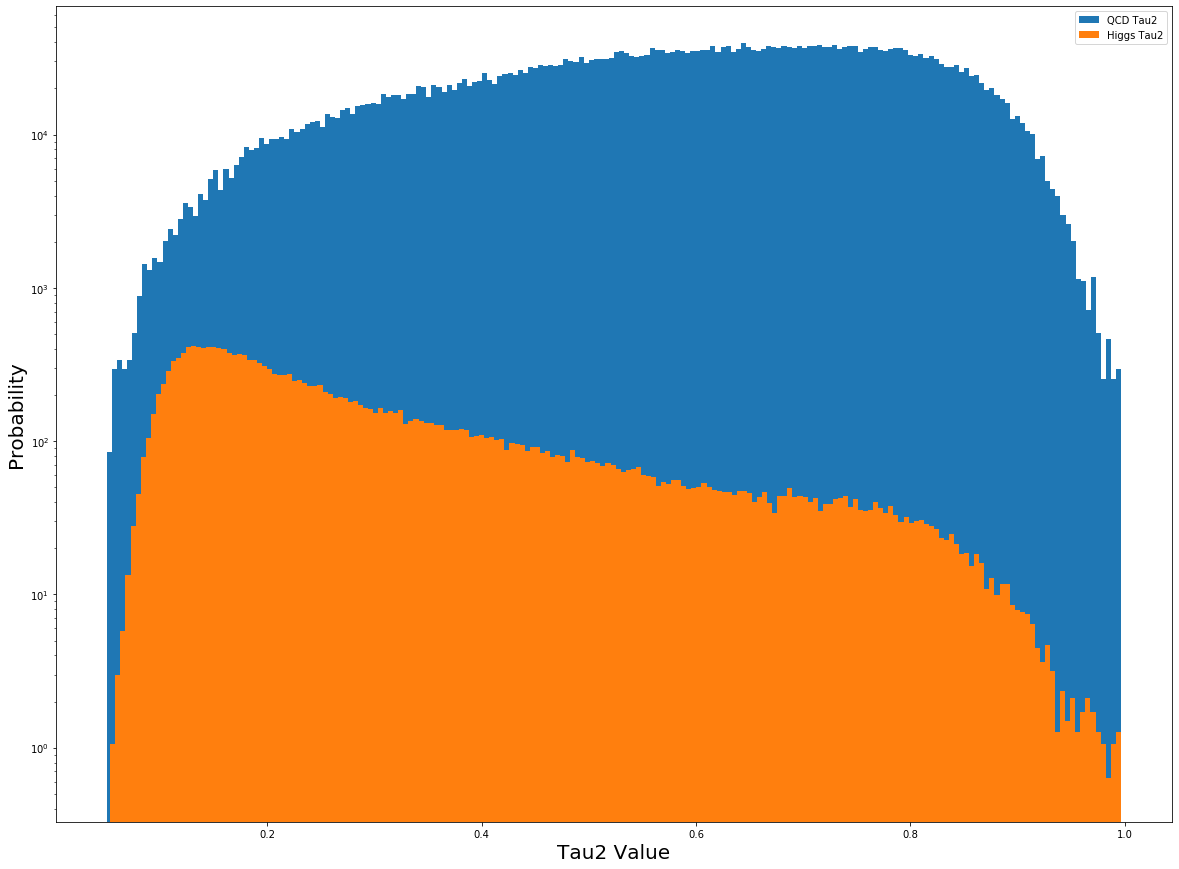

In [18]:
# Plotting Tau2 Cut A
#qcd data 
hist_qcd, bins_q = np.histogram(qT2A, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Tau2')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hT2A, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Tau2")

plt.xlabel('Tau2 Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend()
plt.show()

In [19]:
# Tau2 Cut A Significance Calculations
sigma5 = stats.norm.sf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5e = stats.gamma.ppf(sigma5, a=np.mean(qT2A))
print(f'The detection value on the x-axis would need to be less than or equal to a Ee2 value of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5he = stats.gamma.ppf(sigma5, a=np.mean(hT2A))
print(f'{low5}=QCD low, {low5h}=Higgs low, {low5he / low5e}=Low Ratio')
high5 = stats.gamma.ppf(1-sigma5, a=np.mean(qT2A))
high5h = stats.gamma.ppf(1-sigma5, a=np.mean(hT2A))
print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a Ee2 value of 53.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
53.0=QCD low, 65.0=Higgs low, 7.327224207945296e-11=Low Ratio
13.552816512789976=QCD high, 12.22027950778308=Higgs high, 0.901678222843985=High Ratio


- I could not identify another variable besides mass that was as discriminative as the mass variable (i.e. that had equal or better significance after a feature cut)
### Problem 7.3B
- Instead I could try to find a set of variables to cut along with mass so that in tandem they create a better significance than just one variable after the feature cuts
- First I want to recreate my mass cut feature that also assigns the associated values for another variable from the same measurement to another array
  - For example if the measurement device measures Particle 7 such that it lies in the mass window with a mass of Mass 7, I also want to keep the Transverse Momentum 7, or the $\tau_2$ 7, etc. depending on which variable further optimizes the significance the most

In [20]:
amass = 20
bmass = 130
a = np.min(hT2)
b = 1.0

In [21]:
# Recreating Mass Cut C's For-Loop, but making sure to include arrays for another variable to consider later for cuts
hCut = []
qCut = []
hMassC = []
qMassC = []

hMINm = amass
hMAXm = bmass
for i in range(len(hMass)):
    if hMass[i] < hMAXm and hMass[i] > hMINm:
        hMassC.append(hMass[i])
        hCut.append(hT2[i])
    if qMass[i] < hMAXm and qMass[i] > hMINm:
        qMassC.append(qMass[i])
        qCut.append(qT2[i])
print(len(hMassC), len(qMassC))
print(len(hCut), len(qCut))

97665 80631
97665 80631


- After creating the second array such that only datapoints within the mass window are counted for another variable like transverse momentum, I want to plot the histogram for the second variable to see if I can cut that variable further to continue increasing significance.

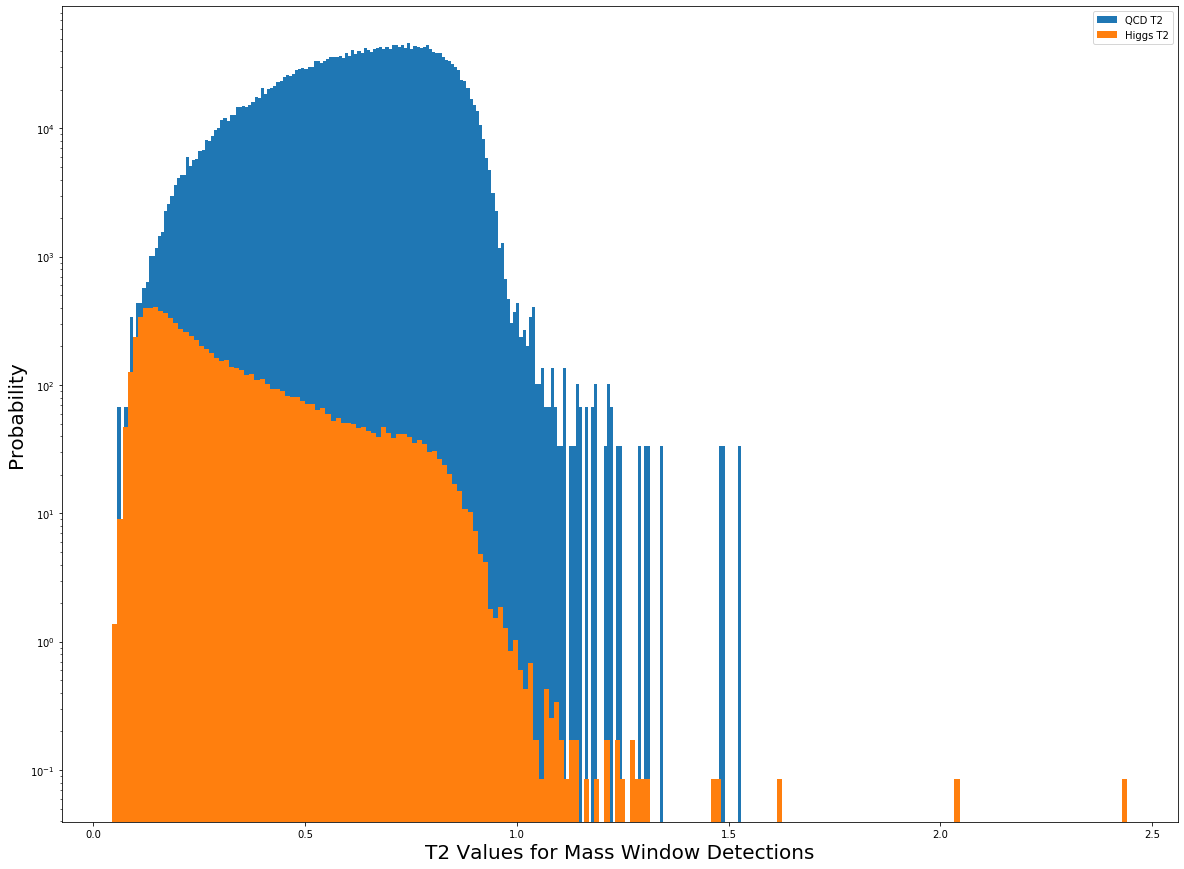

In [22]:
# Plotting Variable Cut with only Mass Window Values
#qcd data 
hist_qcd, bins_q = np.histogram(qCut, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD T2')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hCut, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs T2")

plt.xlabel('T2 Values for Mass Window Detections', size=20)
plt.ylabel('Probability', size=20)
plt.legend()
plt.show()

In [23]:
# Basic Tau2 Significance (within Mass Cut)

low5 = stats.gamma.ppf(sigma5, a=np.mean(qCut))
print(f'The detection value on the x-axis would need to be less than or equal to a Tau2 value of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5h = stats.gamma.ppf(sigma5, a=np.mean(hCut))
print(f'{low5}=QCD low, {low5h}=Higgs low, {low5he / low5e}=Low Ratio')
high5 = stats.gamma.ppf(1-sigma5, a=np.mean(qCut))
high5h = stats.gamma.ppf(1-sigma5, a=np.mean(hCut))
print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

# low5 = stats.norm.ppf(sigma5, loc=np.mean(qCut), scale=np.std(qCut))
# print(f'The detection value on the x-axis would need to be less than or equal to a D2 value of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
# low5h = stats.norm.ppf(sigma5, loc=np.mean(hCut), scale=np.std(hCut))
# print(f'{low5}=QCD low, {low5h}=Higgs low, {low5h / low5}=Low Ratio')
# high5 = stats.norm.ppf(1-sigma5, loc=np.mean(qCut), scale=np.std(qCut))
# high5h = stats.norm.ppf(1-sigma5, loc=np.mean(hCut), scale=np.std(hCut))
# print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

The detection value on the x-axis would need to be less than or equal to a Tau2 value of 3.661452846476163e-11 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
3.661452846476163e-11=QCD low, 6.124072075283234e-22=Higgs low, 7.327224207945296e-11=Low Ratio
13.723191023802222=QCD high, 12.228788590093274=Higgs high, 0.8911038670876927=High Ratio


In [24]:
# Making Tau2 Cut within Mass Window Cut
hCut2 = []
qCut2 = []

hMINt = a
hMAXt = b
for i in range(len(hCut)):
    if hCut[i] < hMAXt and hCut[i] > hMINt:
        hCut2.append(hCut[i])
for i in range(len(qCut)):
    if qCut[i] < hMAXt and qCut[i] > hMINt:
        qCut2.append(qCut[i])
len(hCut2), len(qCut2)

(97596, 80515)

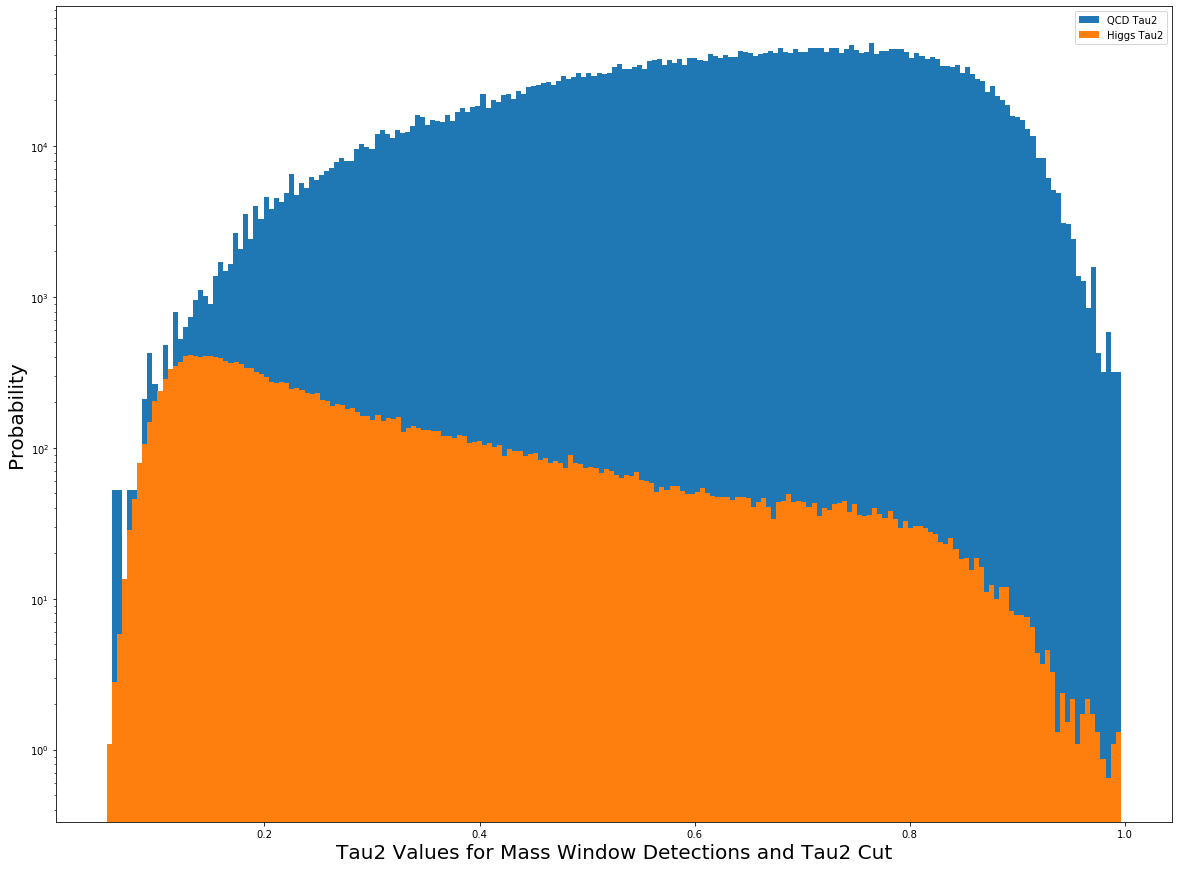

In [25]:
# Plotting Variable Cut with Mass Window Values and Tau2 Cuts
#qcd data 
hist_qcd, bins_q = np.histogram(qCut2, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Tau2')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hCut2, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Tau2")

plt.xlabel('Tau2 Values for Mass Window Detections and Tau2 Cut', size=20)
plt.ylabel('Probability', size=20)
plt.legend()
plt.show()

In [26]:
sigma5 = stats.norm.sf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5 = stats.gamma.ppf(sigma5, a=np.mean(qCut2))
print(f'The detection value on the x-axis would need to be less than or equal to a D2 value of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5h = stats.gamma.ppf(sigma5, a=np.mean(hCut2))
print(f'{low5}=QCD low, {low5h}=Higgs low, {low5he / low5e}=Low Ratio')
high5 = stats.gamma.ppf(1-sigma5, a=np.mean(qCut2))
high5h = stats.gamma.ppf(1-sigma5, a=np.mean(hCut2))
print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

# low5 = stats.norm.ppf(sigma5, loc=np.mean(qCut2), scale=np.std(qCut2))
# print(f'The detection value on the x-axis would need to be less than or equal to a D2 value of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
# low5h = stats.norm.ppf(sigma5, loc=np.mean(hCut2), scale=np.std(hCut2))
# print(f'{low5}=QCD low, {low5h}=Higgs low, {low5h / low5}=Low Ratio')
# high5 = stats.norm.ppf(1-sigma5, loc=np.mean(qCut2), scale=np.std(qCut2))
# high5h = stats.norm.ppf(1-sigma5, loc=np.mean(hCut2), scale=np.std(hCut2))
# print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a D2 value of 3.570024414804002e-11 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
3.570024414804002e-11=QCD low, 5.593002898535251e-22=Higgs low, 7.327224207945296e-11=Low Ratio
13.720541767364372=QCD high, 12.225519568506739=Higgs high, 0.8910376700711857=High Ratio


In [27]:
# Apply Mass window
hCut = []
qCut = []
hMassC = []
qMassC = []

hMINm = amass
hMAXm = bmass
for i in range(len(hMass)):
    if hMass[i] < hMAXm and hMass[i] > hMINm:
        hMassC.append(hMass[i])
        hCut.append(hD2[i])
    if qMass[i] < hMAXm and qMass[i] > hMINm:
        qMassC.append(qMass[i])
        qCut.append(qD2[i])
print(len(hMassC), len(qMassC))
print(len(hCut), len(qCut))

# Then apply Tau2 Window and Create New Array for only those masses
hCut2 = []
qCut2 = []
hMassCuts = []
qMassCuts = []

hMINt = a
hMAXt = b
for i in range(len(hCut)):
    if hCut[i] < hMAXt and hCut[i] > hMINt:
        hCut2.append(hCut[i])
        hMassCuts.append(hMassC[i])
for i in range(len(qCut)):
    if qCut[i] < hMAXt and qCut[i] > hMINt:
        qCut2.append(qCut[i])
        qMassCuts.append(qMassC[i])
        
print(len(hCut2), len(qCut2))
print(len(hMassCuts), len(qMassCuts))

97665 80631
97665 80631
40698 192
40698 192


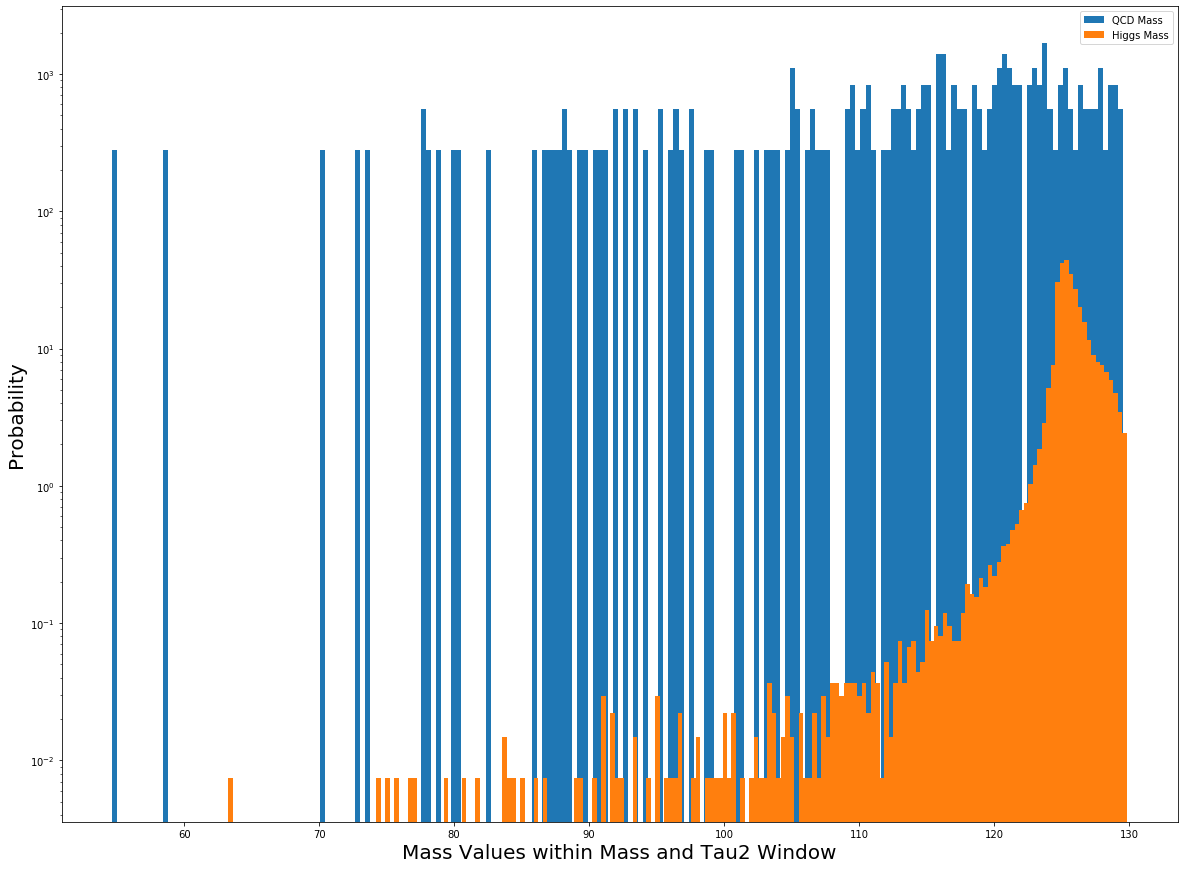

In [28]:
# Plotting Masses within Mass Window and Tau2 Window
#qcd data 
hist_qcd, bins_q = np.histogram(qMassCuts, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMassCuts, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

plt.xlabel('Mass Values within Mass and Tau2 Window', size=20)
plt.ylabel('Probability', size=20)
plt.legend()
plt.show()

In [29]:
# Stats for Mass and Tau2 Window above
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5C = stats.poisson.ppf(sigma5, mu=np.mean(qMassCuts))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5C} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5hC = stats.poisson.ppf(sigma5, mu=np.mean(hMassCuts))
print(f'{low5C}=QCD low, {low5hC}=Higgs low, {low5hC / low5C}=Low Ratio')

high5C = stats.poisson.ppf(1-sigma5, mu=np.mean(qMassCuts))
high5hC = stats.poisson.ppf(1-sigma5, mu=np.mean(hMassCuts))
print(f'{high5C}=QCD high, {high5hC}=Higgs high, {high5hC / high5C}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 63.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
63.0=QCD low, 74.0=Higgs low, 1.1746031746031746=Low Ratio
168.0=QCD high, 186.0=Higgs high, 1.1071428571428572=High Ratio


- We can compare these ratios above to the original ratios below for solely the mass cut to see if the significance has been improved

In [30]:
# STATISTICS FOR MASS WINDOW ONLY
Nhiggs = 100
Nqcd = 20000
Nhiggs / np.sqrt(Nqcd)
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5C = stats.poisson.ppf(sigma5, mu=np.mean(qMassC))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5C} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5hC = stats.poisson.ppf(sigma5, mu=np.mean(hMassC))
print(f'{low5C}=QCD low, {low5hC}=Higgs low, {low5hC / low5C}=Low Ratio')

high5C = stats.poisson.ppf(1-sigma5, mu=np.mean(qMassC))
high5hC = stats.poisson.ppf(1-sigma5, mu=np.mean(hMassC))
print(f'{high5C}=QCD high, {high5hC}=Higgs high, {high5hC / high5C}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 40.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
40.0=QCD low, 65.0=Higgs low, 1.625=Low Ratio
129.0=QCD high, 172.0=Higgs high, 1.3333333333333333=High Ratio


- After trying every variable to cut in tandem with the mass variable, I found that no variable when paired with mass and cut, would increase the significance after the feature cut in such a way that the significance became a value greater than or on par with the single mass cut significance value. 
  - Above is an example of one trial of a variable where I used $\tau_2$ as my variable of choice, and then found that applying a $\tau_2$ window alongside a mass window would not increase the significance, no matter the specifics of the tau window
  - This was the case for all other variables. Applying them alongside the mass feature and then applying cuts to both variables only reduced the significance when we checked back on the mass significance values.
### Problem 7.4
- **Significance Improvements**
  - Before any mass cuts, I had a significance value of 1.13 for the high ratio of significant detections and 1.22 for the low ratio of significant detection values
  - After my feature cuts (solely my mass cut), I had a significance of 1.333 for the high ratio of significant detections and 1.625 for the low ratio of significant detections.
    - My partner had a high ratio before any feature cuts of 0.75, and after the feature cut, achieved a ratio of 1.17.
  - Overall, my mass cut improved the significance by a decent amount and the mass cut itself cannot be finetuned to produce further optimization of significance of the data, which was determined after several trials of changes to parameters pertaining to the mass cut. 
  - Since the mass cut cannot be optimized further, and the other variables do not help to increase the significance when cut alongside the mass cut, the mass cut is now my optimized event selection feature cut.

## Lab 8
- I now want to analyze a pseduo-experiement dataset using my event selection. 
### Problem 8.1
- I want to look at a high-luminosity dataset and complete the following:
  - Focusing on each feature of my event selection, I want to plot the observed data, overlap with my expected signal and background (normalized by observed yields) from Lab 07 above **with no event selection**
  - I want to plot the same graph again with optimal event selection applied
  - I want to evaluate the observed significance and compare my results to my expectations

In [31]:
hlumi = pd.read_hdf('data_highLumi_pt_250_500.h5', mode='r')
hlumi

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,491.273762,0.885859,-1.607844,58.540714,0.027848,0.000236,10.916629,0.002658,0.723524,0.576035,0.451149,0.796152,0.783197,0.105238
1,443.077741,-0.850850,-1.808610,109.261432,0.111414,0.003361,2.430250,0.003674,1.081477,0.488437,0.431396,0.451639,0.883217,0.254729
2,487.700656,-0.848095,3.101697,80.398065,0.059299,0.000973,4.666474,0.004545,0.885087,0.637212,0.476032,0.719942,0.747054,0.231983
3,474.234962,1.501633,-1.656456,90.085535,0.061264,0.001368,5.948416,0.001163,1.354343,0.698983,0.668163,0.516104,0.955908,0.096045
4,485.597724,1.021424,1.742641,119.889999,0.133209,0.003223,1.363644,0.001526,0.905440,0.354629,0.219775,0.391665,0.619733,0.406962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40339,463.278465,1.715067,-2.254925,79.321004,0.066043,0.001196,4.150582,0.000477,0.837033,0.602315,0.573286,0.719583,0.951804,0.266005
40340,418.496927,-2.246578,1.679789,44.635757,0.030060,0.000199,7.316158,0.000066,0.922342,0.801027,0.579431,0.868470,0.723360,0.037072
40341,474.840070,-0.981801,3.135062,55.302586,0.031332,0.000290,9.421780,0.003184,0.814772,0.695005,0.503360,0.853005,0.724255,0.102287
40342,460.901330,0.764519,-0.736565,72.333900,0.037743,0.000560,10.421032,0.005506,0.910557,0.675996,0.491189,0.742398,0.726616,0.059109


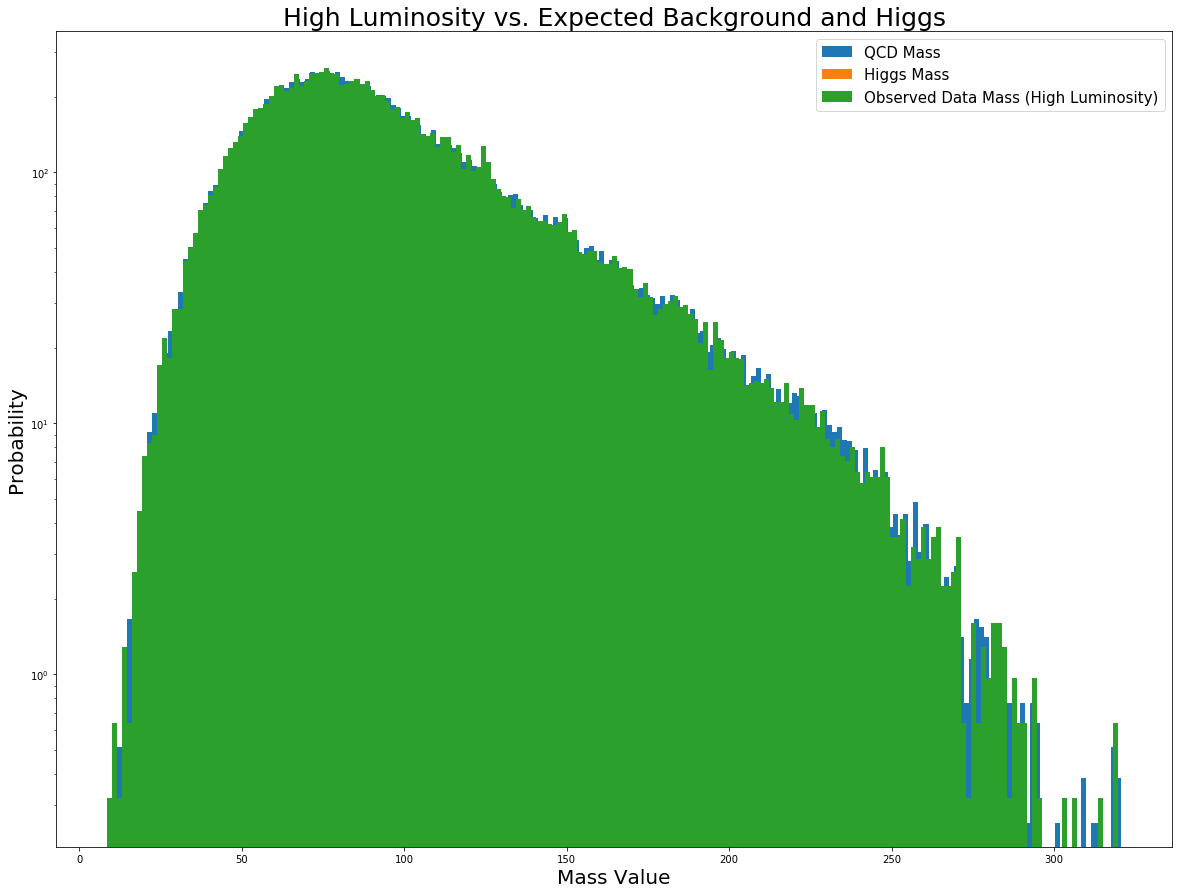

In [32]:
# Plotting High Luminosity vs. Expected Background/Higgs
n_higgs = 100
n_qcd = 20000
n_tot = 20100
# Lab 07 Normalized qcd data 
hist_qcd, bins_q = np.histogram(qMass, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# Lab 07 Normalized Higgs Data
hist_higgs, bins_higgs = np.histogram(hMass, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

# lab 08 Hi-Luminosity Data
hlumiMass = hlumi['mass']
hist_hlumi, bins_hlumi = np.histogram(hlumiMass, bins=200, density=True)
widths_hlumi = np.diff(bins_hlumi)
hist_hlumi *= n_tot
plt.bar(bins_hlumi[:-1], hist_hlumi, widths_hlumi, label = "Observed Data Mass (High Luminosity)")

plt.title('High Luminosity vs. Expected Background and Higgs', size=25)
plt.xlabel('Mass Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend(fontsize=15)
plt.show()

In [33]:
low5q = stats.poisson.ppf(sigma5, mu=np.mean(qMass))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5q} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5hl = stats.poisson.ppf(sigma5, mu=np.mean(hlumiMass))
print(f'{low5q}=QCD low, {low5hl}=Data low, {low5hl / low5q}=Low Ratio')

high5q = stats.poisson.ppf(1-sigma5, mu=np.mean(qMass))
high5hl = stats.poisson.ppf(1-sigma5, mu=np.mean(hlumiMass))
print(f'{high5q}=QCD high, {high5hl}=Data high, {high5hl / high5q}=High Ratio')

The detection value on the x-axis would need to be less than or equal to a mass of 53.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
53.0=QCD low, 53.0=Data low, 1.0=Low Ratio
151.0=QCD high, 151.0=Data high, 1.0=High Ratio


In [34]:
# Basic Significance Ratio (No Cuts) from Simulation Data
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5 = stats.poisson.ppf(sigma5, mu=np.mean(qMass))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5h = stats.poisson.ppf(sigma5, mu=np.mean(hMass))
print(f'{low5}=QCD low, {low5h}=Higgs low, {low5h / low5}=Low Ratio')
high5 = stats.poisson.ppf(1-sigma5, mu=np.mean(qMass))
high5h = stats.poisson.ppf(1-sigma5, mu=np.mean(hMass))
print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 53.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
53.0=QCD low, 65.0=Higgs low, 1.2264150943396226=Low Ratio
151.0=QCD high, 172.0=Higgs high, 1.1390728476821192=High Ratio


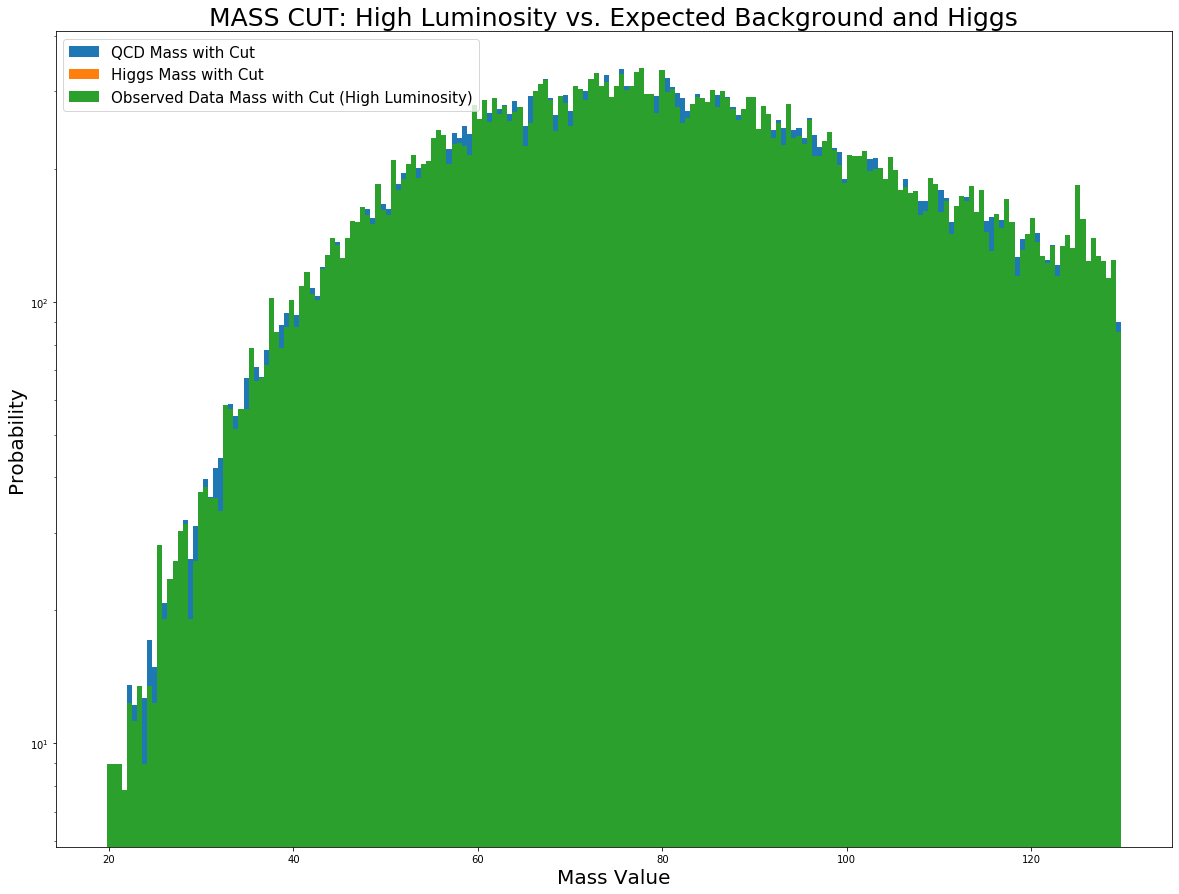

In [35]:
# Plotting MASS CUT: High Luminosity vs. Expected Background/Higgs

# Recreate Mass Cut and Apply to Observed Data
hMassC = []
qMassC = []
lumiCut = []
amass = 20
bmass = 130
hMINX = amass
hMAXX = bmass
for i in range(len(hMass)):
    if hMass[i] < hMAXX and hMass[i] > hMINX:
        hMassC.append(hMass[i])
    if qMass[i] < hMAXX and qMass[i] > hMINX:
        qMassC.append(qMass[i])
for i in range(len(hlumiMass)):
    if hlumiMass[i] < hMAXX and hlumiMass[i] > hMINX:
        lumiCut.append(hlumiMass[i])

# Lab 07 Normalized qcd data with Mass Cut
hist_qcd, bins_q = np.histogram(qMassC, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass with Cut')

# Lab 07 Normalized Higgs Data with Cut
hist_higgs, bins_higgs = np.histogram(hMassC, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass with Cut")

# lab 08 Hi-Luminosity Data with Cut
hist_hlumi, bins_hlumi = np.histogram(lumiCut, bins=200, density=True)
widths_hlumi = np.diff(bins_hlumi)
hist_hlumi *= n_tot
plt.bar(bins_hlumi[:-1], hist_hlumi, widths_hlumi, label = "Observed Data Mass with Cut (High Luminosity)")

plt.title('MASS CUT: High Luminosity vs. Expected Background and Higgs', size=25)
plt.xlabel('Mass Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend(fontsize=15)
plt.show()

In [36]:
# significance of pseudo-data with cut
low5qCut = stats.poisson.ppf(sigma5, mu=np.mean(qMassC))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5qCut} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5hlCut = stats.poisson.ppf(sigma5, mu=np.mean(lumiCut))
print(f'{low5qCut}=QCD low, {low5hlCut}=Data low, {low5hlCut / low5qCut}=Low Ratio')

high5qCut = stats.poisson.ppf(1-sigma5, mu=np.mean(qMassC))
high5hlCut = stats.poisson.ppf(1-sigma5, mu=np.mean(lumiCut))
print(f'{high5qCut}=QCD high, {high5hlCut}=Data high, {high5hlCut / high5qCut}=High Ratio')

The detection value on the x-axis would need to be less than or equal to a mass of 40.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
40.0=QCD low, 40.0=Data low, 1.0=Low Ratio
129.0=QCD high, 130.0=Data high, 1.0077519379844961=High Ratio


In [37]:
# Lab 07 Simulation Data w/ Mass Cut Significance to compare
low5C = stats.poisson.ppf(sigma5, mu=np.mean(qMassC))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5C} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5hC = stats.poisson.ppf(sigma5, mu=np.mean(hMassC))
print(f'{low5C}=QCD low, {low5hC}=Higgs low, {low5hC / low5C}=Low Ratio')

high5C = stats.poisson.ppf(1-sigma5, mu=np.mean(qMassC))
high5hC = stats.poisson.ppf(1-sigma5, mu=np.mean(hMassC))
print(f'{high5C}=QCD high, {high5hC}=Higgs high, {high5hC / high5C}=High Ratio')

The detection value on the x-axis would need to be less than or equal to a mass of 40.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
40.0=QCD low, 65.0=Higgs low, 1.625=Low Ratio
129.0=QCD high, 172.0=Higgs high, 1.3333333333333333=High Ratio


- From above the feature cut significance for the pseudo-data is 1.0077 while the significance with no feature cut is 1.0000, so the improvement to significance was overall smaller than the expected improvement from Lab 07
  - This is probably due to the fact that the pseudo-data contains both Higgs values and Background values merged inside the array, since my cuts are meant to distinguish the two from one another in the first place
### Problem 8.2
- Now, I want to apply the same cuts to the other pseudo-data file and ask the same questions of my results.

In [38]:
llumi = pd.read_hdf('data_lowLumi_pt_250_500.h5', mode='r')
llumi

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,499.974801,-0.340430,-3.124063,35.763836,0.016922,0.000061,12.505765,0.003937,1.181578,0.797111,0.724045,0.674615,0.908337,0.026663
1,470.525978,1.447995,-0.463162,79.069978,0.052447,0.000801,5.549873,0.000965,0.924677,0.752034,0.679503,0.813294,0.903554,0.136669
2,455.009985,-1.672870,-2.260314,56.401982,0.030301,0.000229,8.234025,0.000417,0.892902,0.630183,0.538919,0.705769,0.855178,0.106421
3,387.414081,-1.002107,-2.688377,77.412447,0.092790,0.001888,2.363279,0.002206,0.975771,0.461347,0.338407,0.472803,0.733519,0.324391
4,442.472789,-1.103515,-2.367580,86.479013,0.049532,0.000909,7.483889,0.002174,0.782566,0.668635,0.432825,0.854414,0.647326,0.041830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,485.528722,1.349769,1.178191,101.540846,0.093551,0.002513,3.069102,0.002492,1.006359,0.811150,0.664146,0.806025,0.818770,0.164820
4056,472.231371,1.874326,-0.785502,48.174004,0.025348,0.000161,9.860763,0.000308,1.036714,0.918382,0.721017,0.885858,0.785095,0.038309
4057,407.594270,0.494450,-1.839265,67.141046,0.061750,0.000890,3.778698,0.003875,0.957798,0.730431,0.548445,0.762615,0.750852,0.298864
4058,417.108347,-1.391452,-0.368711,126.643493,0.163618,0.007312,1.669434,0.001432,1.184487,0.673570,0.573632,0.568659,0.851630,0.373660


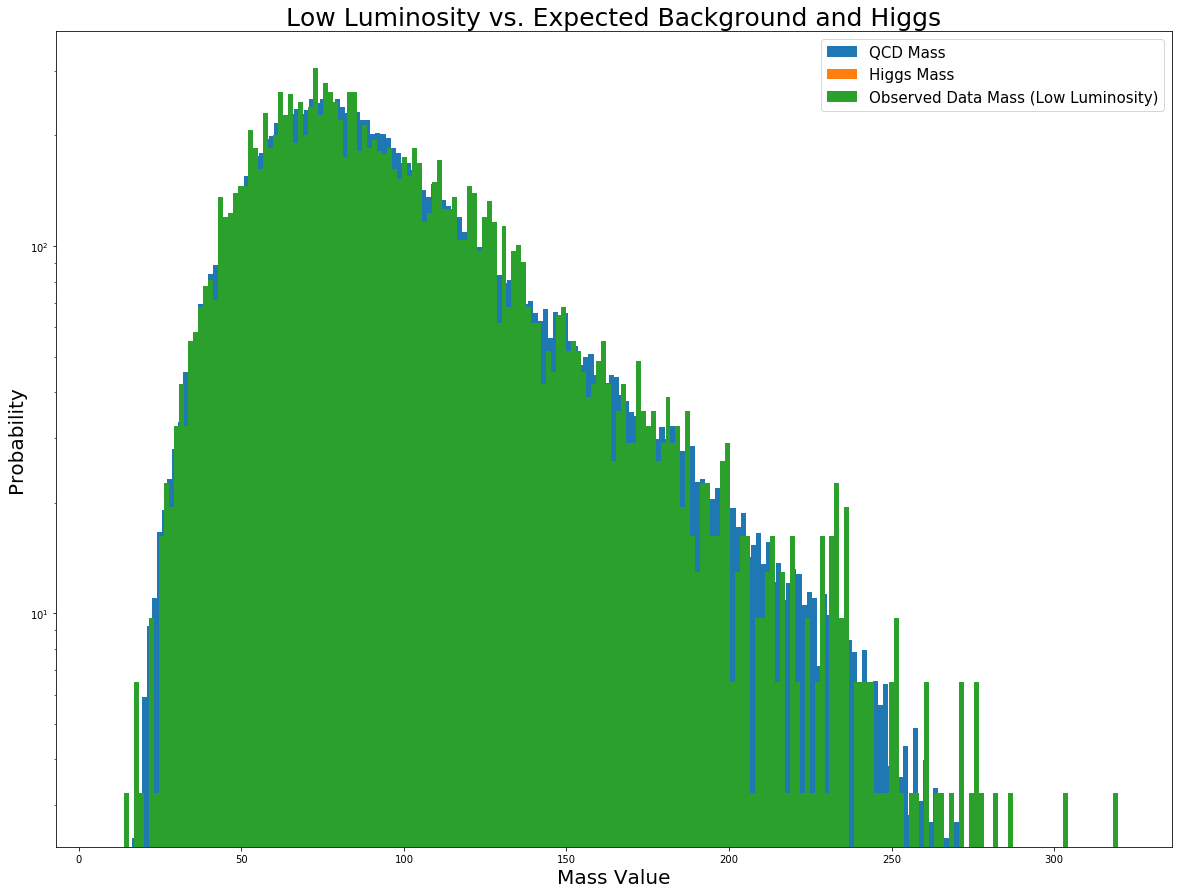

In [39]:
# Plotting Low Luminosity vs. Expected Background/Higgs

n_higgs = 100
n_qcd = 20000
n_tot = 20100
# Lab 07 Normalized qcd data 
hist_qcd, bins_q = np.histogram(qMass, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# Lab 07 Normalized Higgs Data
hist_higgs, bins_higgs = np.histogram(hMass, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

# lab 08 Hi-Luminosity Data
llumiMass = llumi['mass']
hist_llumi, bins_llumi = np.histogram(llumiMass, bins=200, density=True)
widths_llumi = np.diff(bins_llumi)
hist_llumi *= n_tot
plt.bar(bins_llumi[:-1], hist_llumi, widths_llumi, label = "Observed Data Mass (Low Luminosity)")

plt.title('Low Luminosity vs. Expected Background and Higgs', size=25)
plt.xlabel('Mass Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend(fontsize=15)
plt.show()

In [40]:
# Significance of Low Luminosity pseudo-data (No Cuts)
low5q = stats.poisson.ppf(sigma5, mu=np.mean(qMass))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5q} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5hl = stats.poisson.ppf(sigma5, mu=np.mean(llumiMass))
print(f'{low5q}=QCD low, {low5hl}=Data low, {low5hl / low5q}=Low Ratio')

high5q = stats.poisson.ppf(1-sigma5, mu=np.mean(qMass))
high5hl = stats.poisson.ppf(1-sigma5, mu=np.mean(llumiMass))
print(f'{high5q}=QCD high, {high5hl}=Data high, {high5hl / high5q}=High Ratio')

The detection value on the x-axis would need to be less than or equal to a mass of 53.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
53.0=QCD low, 52.0=Data low, 0.9811320754716981=Low Ratio
151.0=QCD high, 150.0=Data high, 0.9933774834437086=High Ratio


In [41]:
# Basic Significance Ratio (No Cuts) from Lab 07
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5 = stats.poisson.ppf(sigma5, mu=np.mean(qMass))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5h = stats.poisson.ppf(sigma5, mu=np.mean(hMass))
print(f'{low5}=QCD low, {low5h}=Higgs low, {low5h / low5}=Low Ratio')
high5 = stats.poisson.ppf(1-sigma5, mu=np.mean(qMass))
high5h = stats.poisson.ppf(1-sigma5, mu=np.mean(hMass))
print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 53.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
53.0=QCD low, 65.0=Higgs low, 1.2264150943396226=Low Ratio
151.0=QCD high, 172.0=Higgs high, 1.1390728476821192=High Ratio


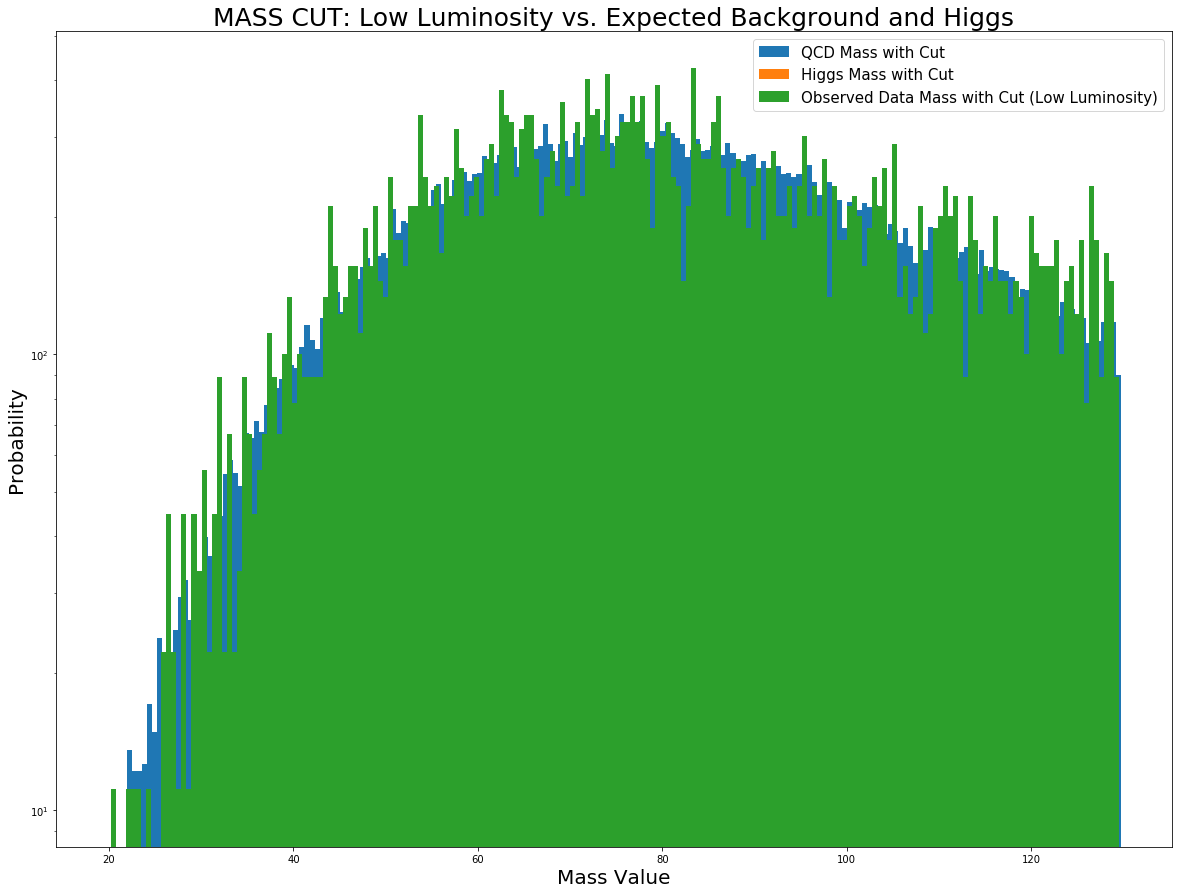

In [42]:
# Plotting MASS CUT: Low Luminosity vs. Expected Background/Higgs

# Recreate Mass Cut and Apply to Observed Data for Low Luminosity
hMassC = []
qMassC = []
llumiCut = []
amass = 20
bmass = 130
hMINX = amass
hMAXX = bmass
for i in range(len(hMass)):
    if hMass[i] < hMAXX and hMass[i] > hMINX:
        hMassC.append(hMass[i])
    if qMass[i] < hMAXX and qMass[i] > hMINX:
        qMassC.append(qMass[i])
for i in range(len(llumiMass)):
    if llumiMass[i] < hMAXX and llumiMass[i] > hMINX:
        llumiCut.append(llumiMass[i])

# Lab 07 Normalized qcd data with Mass Cut
hist_qcd, bins_q = np.histogram(qMassC, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass with Cut')

# Lab 07 Normalized Higgs Data with Cut
hist_higgs, bins_higgs = np.histogram(hMassC, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass with Cut")

# lab 08 Lo-Luminosity Data with Cut
hist_hlumi, bins_hlumi = np.histogram(llumiCut, bins=200, density=True)
widths_hlumi = np.diff(bins_hlumi)
hist_hlumi *= n_tot
plt.bar(bins_hlumi[:-1], hist_hlumi, widths_hlumi, label = "Observed Data Mass with Cut (Low Luminosity)")

plt.title('MASS CUT: Low Luminosity vs. Expected Background and Higgs', size=25)
plt.xlabel('Mass Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend(fontsize=15)
plt.show()

In [43]:
# significance of low-luminosity pseudo-data with cut
low5qCut = stats.poisson.ppf(sigma5, mu=np.mean(qMassC))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5qCut} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5hlCut = stats.poisson.ppf(sigma5, mu=np.mean(llumiCut))
print(f'{low5qCut}=QCD low, {low5hlCut}=Data low, {low5hlCut / low5qCut}=Low Ratio')

high5qCut = stats.poisson.ppf(1-sigma5, mu=np.mean(qMassC))
high5hlCut = stats.poisson.ppf(1-sigma5, mu=np.mean(llumiCut))
print(f'{high5qCut}=QCD high, {high5hlCut}=Data high, {high5hlCut / high5qCut}=High Ratio')

The detection value on the x-axis would need to be less than or equal to a mass of 40.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
40.0=QCD low, 40.0=Data low, 1.0=Low Ratio
129.0=QCD high, 130.0=Data high, 1.0077519379844961=High Ratio


In [44]:
# Lab 07 Mass Cut Significance to compare
low5C = stats.poisson.ppf(sigma5, mu=np.mean(qMassC))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5C} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5hC = stats.poisson.ppf(sigma5, mu=np.mean(hMassC))
print(f'{low5C}=QCD low, {low5hC}=Higgs low, {low5hC / low5C}=Low Ratio')

high5C = stats.poisson.ppf(1-sigma5, mu=np.mean(qMassC))
high5hC = stats.poisson.ppf(1-sigma5, mu=np.mean(hMassC))
print(f'{high5C}=QCD high, {high5hC}=Higgs high, {high5hC / high5C}=High Ratio')

The detection value on the x-axis would need to be less than or equal to a mass of 40.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
40.0=QCD low, 65.0=Higgs low, 1.625=Low Ratio
129.0=QCD high, 172.0=Higgs high, 1.3333333333333333=High Ratio


- Similar to the high luminosity data, the feature cut increased the significance of the data, but not by as much as expected
  - This is for the same reason as before, where the data is both higgs and background, so it is not going to have significance increases by the same scale as an all-higgs detection dataset
### Problem 8.3
- In the low luminosity data, the observed significance is less than 5$\sigma$
  - I want to calculate the 95% confidence level upper limit of signal yield for both the expected and observed datasets

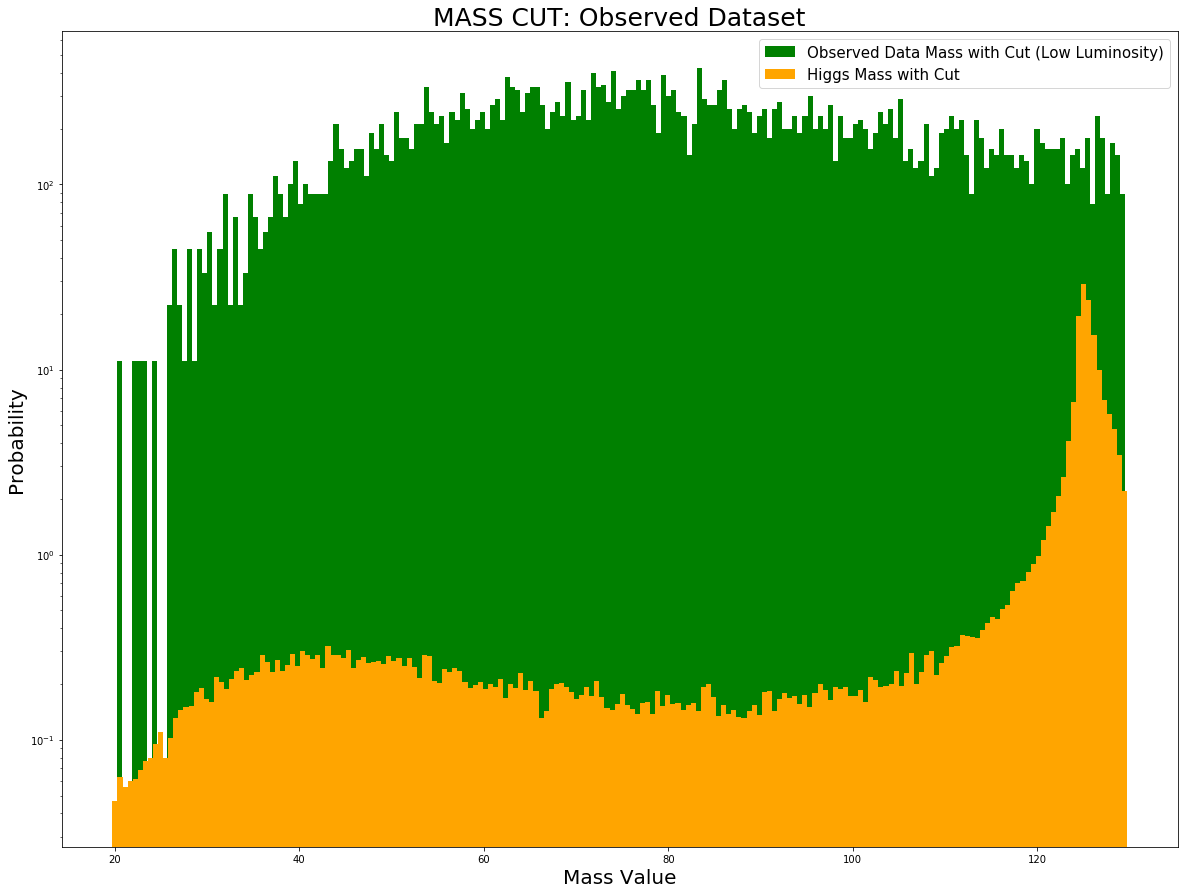

In [125]:
# Upper limit on Observed Dataset
plt.yscale('log')
# Lab 08 Lo-Luminosity Data with Cut
hist_hlumi, bins_hlumi = np.histogram(llumiCut, bins=200, density=True)
widths_hlumi = np.diff(bins_hlumi)
hist_hlumi *= n_tot
plt.bar(bins_hlumi[:-1], hist_hlumi, widths_hlumi, color='g',label = "Observed Data Mass with Cut (Low Luminosity)")

# Lab 07 Normalized Higgs Data with Cut
hist_higgs, bins_higgs = np.histogram(hMassC, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, color='orange', label = "Higgs Mass with Cut")

plt.title('MASS CUT: Observed Dataset', size=25)
plt.xlabel('Mass Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend(fontsize=15)
plt.show()

- looking at the above, for an observed value (that is also a weaker signal) on the Green Low Luminosity histogram, I want to calculate the 95% confidence upper limit of the true Higgs signal from the expected
  - NOTE: the area of the curves above are not normalized to 1, but instead to expected yields in number of particles. This does not affect the calculation for the upper limit below.

In [138]:
# want to find the value on the Higgs graph that when calculating an integral underneath the orange curve from right to left, I get a value of 0.95 since the area under this curve is 1
upperObs = stats.poisson.isf(0.95, mu=30, loc=20)
print(f'My 95% confidence upper limit for the observed data is {upperObs} on the x-axis of mass')

My 95% confidence upper limit for the observed data is 41.0 on the x-axis of mass


- The calculations above say that for a given distribution of observed signals (my low luminosity green distribution), *if I observe a fairly weak signal of mass=30 in green, the true measurement of Higgs mass in orange that would have been detected 95% of the time is a mass=41.0*
  - **Therefore, my observed data confidence upper limit is 41.**
  - In other words, if the true Higgs mass was 41, I would have detected it 95% percent of the time

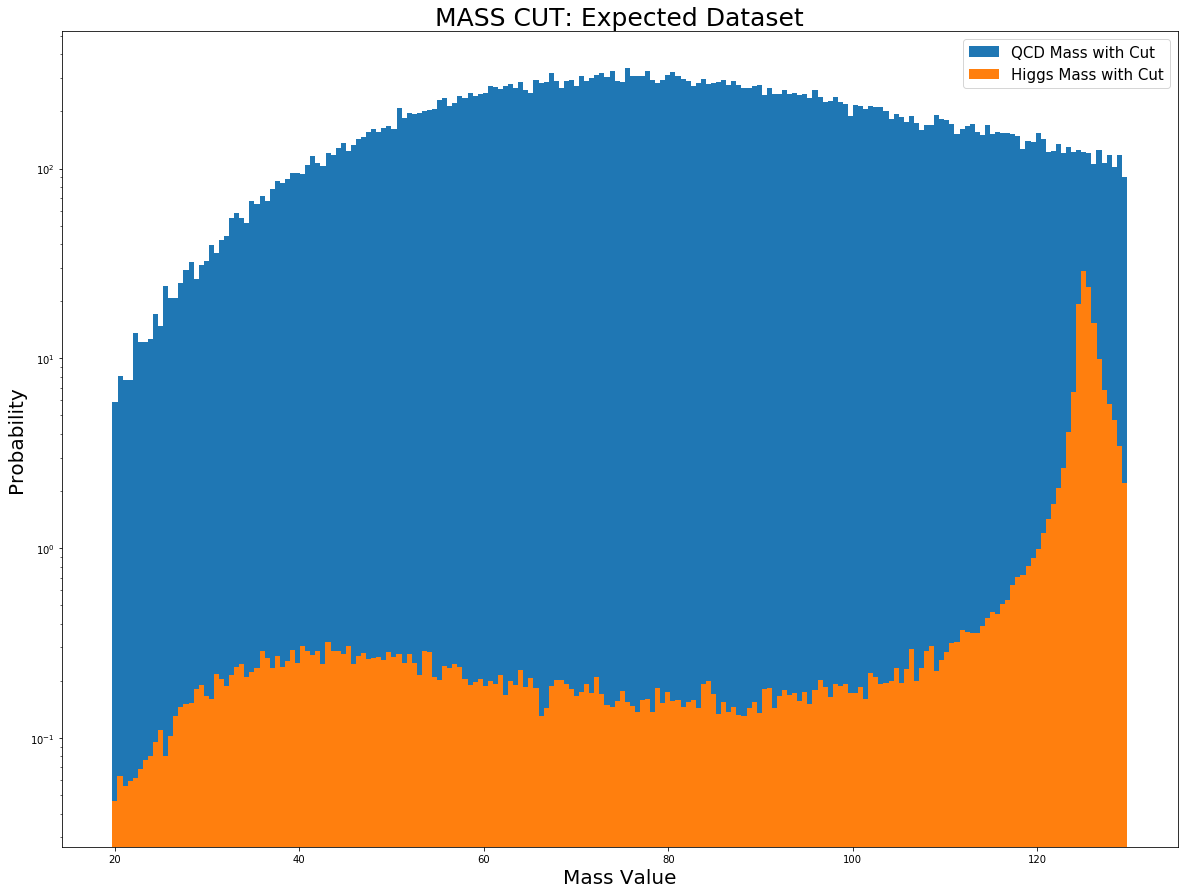

In [117]:
# Upper limit on Expected Dataset
plt.yscale('log')
# Lab 07 Normalized qcd data with Mass Cut
hist_qcd, bins_q = np.histogram(qMassC, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass with Cut')

# Lab 07 Normalized Higgs Data with Cut
hist_higgs, bins_higgs = np.histogram(hMassC, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass with Cut")

plt.title('MASS CUT: Expected Dataset', size=25)
plt.xlabel('Mass Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend(fontsize=15)
plt.show()

- looking at the above, for an observed value on the blue QCD background data histogram, I want to calculate the 95% confidence upper limit of the true Higgs signal from the expected
  - NOTE: the area of the curves above are not normalized to 1, but instead to expected yields in number of particles. This does not affect the calculation for the upper limit below.

In [139]:
# want to find the value on the Higgs graph that when calculating an integral underneath the orange curve from right to left, I get a value of 0.95 since the area under this curve is 1
upperExp = stats.poisson.isf(0.95, mu=30, loc=20)
print(f'My 95% confidence upper limit for the observed data is {upperExp} on the x-axis of mass')

My 95% confidence upper limit for the observed data is 41.0 on the x-axis of mass


- The calculations above say that for a given distribution of observed signals (my QCD background blue distribution), *if I observe a fairly weak signal of mass=30 in blue, the true measurement of Higgs mass in orange that would have been detected 95% of the time is a mass=41.0*
  - **Therefore, my expected data confidence upper limit is 41.**
  - In other words, if the true Higgs mass was 41, I would have detected it 95% percent of the time
- This is the same as the observed data, because either the simulated (expected) data is very similar to the observed low-luminosity data, or because both are in comparison to the same Higgs simulation data, or some combination of both of the above factors.